In [1]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'            # 자기 경로를 쓰기

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'

Mounted at /gdrive
중간저장  list.txt  reviews_1.csv  reviews_2.csv  reviews_3.csv  reviews.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

In [3]:
import pandas as pd
import numpy as np
import collections

# 데이터 전처리

In [4]:
# df 가져오기
df = pd.read_csv(drive_path + 'reviews_2.csv', encoding='utf-8').iloc[:, 1:]
df.head()

,star,time,review_content
0,5,1달,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,2달,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,5달,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,6달,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,2달,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [5]:
# 기간 정리
time_temp = list(set(df['time'].values))
time_temp2 = sorted([t[::-1] for t in time_temp])
time_temp3 = [t[::-1] for t in time_temp2]
print(time_temp3)

['10년', '1년', '2년', '3년', '4년', '5년', '6년', '7년', '8년', '9년', '10달', '1달', '11달', '2달', '3달', '4달', '5달', '6달', '7달', '8달', '9달', '4일', '6일', '1주', '2주', '3주', '4주']


In [6]:
# 가지고 있는 퍼센트
for i in range(1, 6):
    print(len(df[df['star'] == i]) / len(df) * 100, '%')

print(len(df))

5.119887165021156 %
5.768688293370945 %
18.42031029619182 %
30.155148095909734 %
40.53596614950635 %
7090


In [7]:
# df1 : 4일 ~ 11달 까지 0년으로 처리
# df['time'][0] # '1달'
df1 = df.copy()
for i in range(len(df1)):
    if df1['time'][i] in time_temp3[10:]:
        df1['time'][i] = '0년'
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,star,time,review_content
0,5,0년,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0년,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0년,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0년,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0년,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [8]:
# time을 숫자로 바꾸기
for i in range(len(df1)):
    df1['time'][i] = int(df1['time'][i][:-1])

df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [9]:
# 별, 기간 순으로 정리
def make_star_df(df, star_num):
    return df[df['star'] == star_num]

def make_time_df(df, p_time):
    return df[df['time'] == p_time]

df_s1 = make_star_df(df1, 1)
df_s2 = make_star_df(df1, 2)
df_s3 = make_star_df(df1, 3)
df_s4 = make_star_df(df1, 4)
df_s5 = make_star_df(df1, 5)

df_0y = make_time_df(df1, 0)
df_1y = make_time_df(df1, 1)
df_2y = make_time_df(df1, 2)
df_3y = make_time_df(df1, 3)
df_4y = make_time_df(df1, 4)
df_5y = make_time_df(df1, 5)
df_6y = make_time_df(df1, 6)
df_7y = make_time_df(df1, 7)
df_8y = make_time_df(df1, 8)
df_9y = make_time_df(df1, 9)
df_10y = make_time_df(df1, 10)


In [10]:
df_stars = [df_s1, df_s2, df_s3, df_s4, df_s5]
df_years = [df_0y, df_1y, df_2y, df_3y, df_4y, df_5y, df_6y, df_7y, df_8y, df_9y, df_10y]

In [11]:
dict_basic = {}
for i in range(11):
    dict_basic[i] = 0
df_dict = dict(collections.Counter(df_s1['time'].values))
dict_basic.update(df_dict)
dict_basic

{0: 28, 1: 43, 2: 80, 3: 135, 4: 56, 5: 16, 6: 2, 7: 2, 8: 0, 9: 0, 10: 1}

In [12]:
def dict_maker(df, num=11, columns='time'):
    dict_basics = {}
    for i in range(num):
        dict_basics[i] = 0
    df_dict = dict(collections.Counter(df[columns].values))
    dict_basics.update(df_dict)
    return dict_basics

a = dict_maker(df_s1)
a

{0: 28, 1: 43, 2: 80, 3: 135, 4: 56, 5: 16, 6: 2, 7: 2, 8: 0, 9: 0, 10: 1}

In [13]:
y = {1: 'one', 2: 'two'}
y.update({1: 'ONE', 3: 'THREE'})
y

{1: 'ONE', 2: 'two', 3: 'THREE'}

In [14]:
for i in df_stars:
    print(len(i))

363
409
1306
2138
2874


In [15]:
x = 0
for i in df_years:
    print(len(i))
    x += len(i)

print(x)

877
1221
1560
2093
1050
220
50
11
1
6
1
7090


In [16]:
# 연도별 총 리뷰 수 및 별점 추이
# Line graph by seaborn
ax = sns.lineplot(data=df.T.loc['2011.0':'2021.0', g_k])


plt.title('Renewalbe Energy', fontsize=20)
plt.ylabel('%', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

sns.set(rc = {'figure.figsize':(20,8)})
plt.show()

NameError: ignored

In [17]:
df1.head()

,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [18]:
star_time = pd.DataFrame({  1 : dict_maker(df_s1),
                            2 : dict_maker(df_s2),
                            3 : dict_maker(df_s3),
                            4 : dict_maker(df_s4),
                            5 : dict_maker(df_s5)
                                })

star_time

,1,2,3,4,5
0,28,33,126,263,427
1,43,54,188,332,604
2,80,103,280,491,606
3,135,124,412,639,783
4,56,75,233,326,360
5,16,18,45,65,76
6,2,1,19,16,12
7,2,1,2,3,3
8,0,0,0,1,0
9,0,0,1,2,3


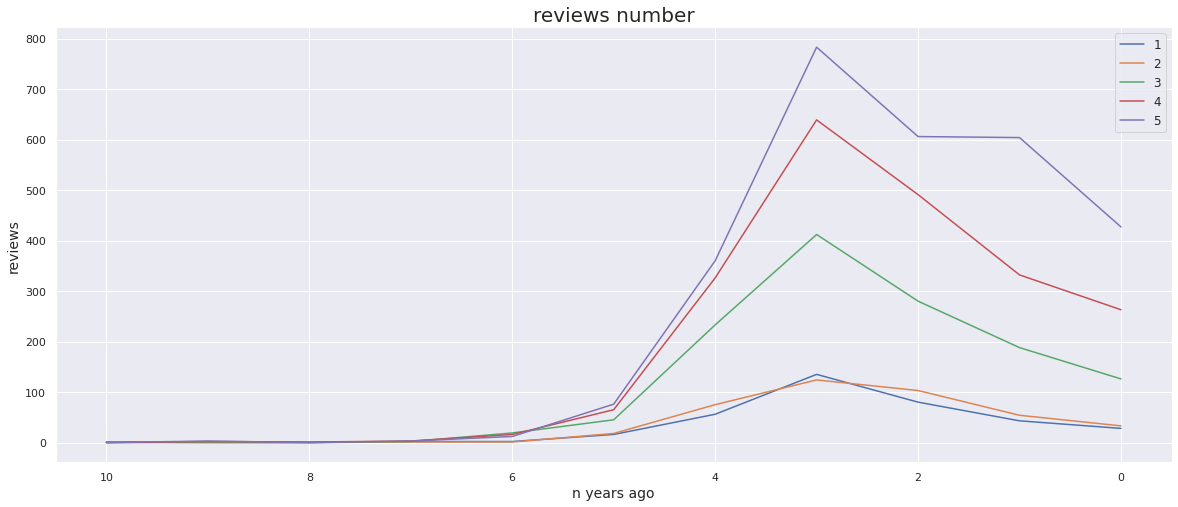

<Figure size 1440x576 with 0 Axes>

In [ ]:
ax = star_time.plot()
ax.invert_xaxis()

plt.title('reviews number', fontsize=20)
plt.ylabel('reviews', fontsize=14)
plt.xlabel('n years ago', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.figure(figsize=(20,8))
plt.show()

In [19]:
star_time.sum(axis=1)

0      877
1     1221
2     1560
3     2093
4     1050
5      220
6       50
7       11
8        1
9        6
10       1
dtype: int64

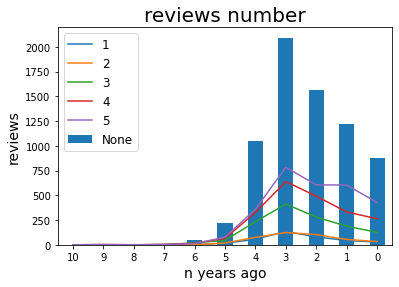

<Figure size 1440x576 with 0 Axes>

In [20]:
ax = star_time.plot()
ax2 = star_time.sum(axis=1).plot.bar(rot=0)
ax.invert_xaxis()

plt.title('reviews number', fontsize=20)
plt.ylabel('reviews', fontsize=14)
plt.xlabel('n years ago', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.figure(figsize=(20,8))
plt.show()

In [21]:
star_time

,1,2,3,4,5
0,28,33,126,263,427
1,43,54,188,332,604
2,80,103,280,491,606
3,135,124,412,639,783
4,56,75,233,326,360
5,16,18,45,65,76
6,2,1,19,16,12
7,2,1,2,3,3
8,0,0,0,1,0
9,0,0,1,2,3


In [22]:
star_time_temp = star_time.copy()

In [23]:
st_col = np.array(star_time_temp.columns)

In [24]:
star_time_temp['mean'] = star_time.apply(lambda x: (np.dot(st_col, np.array(x)) / sum(x)), axis=1)

In [25]:
star_time_temp

,1,2,3,4,5,mean
0,28,33,126,263,427,4.172178
1,43,54,188,332,604,4.146601
2,80,103,280,491,606,3.923077
3,135,124,412,639,783,3.865265
4,56,75,233,326,360,3.818095
5,16,18,45,65,76,3.759091
6,2,1,19,16,12,3.700000
7,2,1,2,3,3,3.363636
8,0,0,0,1,0,4.000000
9,0,0,1,2,3,4.333333


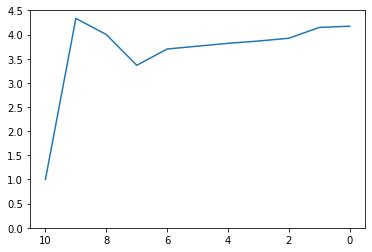

In [26]:
ys = star_time_temp['mean'].to_list()
xs = star_time_temp.index.to_list()

plt.gca().invert_xaxis()
plt.ylim(0, 4.5)
plt.plot(xs, ys)

In [ ]:
'''
지도에 관광코스 추천? 
    - 맵핑으로 마카 위치 표시 : 가지 말아야 할 곳!
리뷰에 코스도 나와있음
맛집, 피해야할 곳 

'''

In [39]:
# 다시 한번 세이브
df1.to_csv(drive_path + 'google_review.csv', encoding='utf-8', index = False)
star_time.to_csv(drive_path + 'star_time.csv', encoding='utf-8', index = False)

# 단어 분석

In [40]:
# 불러오기
reviews = pd.read_csv(drive_path + 'google_review.csv', encoding='utf-8')
st = pd.read_csv(drive_path + 'star_time.csv', encoding='utf-8')


In [41]:
reviews.head()

,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [42]:
st

,1,2,3,4,5
0,28,33,126,263,427
1,43,54,188,332,604
2,80,103,280,491,606
3,135,124,412,639,783
4,56,75,233,326,360
5,16,18,45,65,76
6,2,1,19,16,12
7,2,1,2,3,3
8,0,0,0,1,0
9,0,0,1,2,3


In [ ]:
# 별점 순으로 단어 분석하기
